In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
cd ..

/home/jovyan/UCLA_CSX_450_2_Final


In [5]:
%run src/load_data.py

In [6]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour Utilities  \
Id                                                                            
1          60       RL         65.0     8450      Reg         Lvl    AllPub   
2          20       RL         80.0     9600      Reg         Lvl    AllPub   
3          60       RL         68.0    11250      IR1         Lvl    AllPub   
4          70       RL         60.0     9550      IR1         Lvl    AllPub   
5          60       RL         84.0    14260      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood    ...     PoolArea PoolQC Fence  \
Id                                     ...                             
1     Inside       Gtl      CollgCr    ...            0   None  None   
2        FR2       Gtl      Veenker    ...            0   None  None   
3     Inside       Gtl      CollgCr    ...            0   None  None   
4     Corner       Gtl      Crawfor    ...            0   None  None   
5        FR2       Gtl      NoRidge    ...            0   None  None   

   MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
Id                                                                       
1         None       0      2   2008       WD         Normal     208500  
2         None       0      5   2007       WD         Normal     181500  
3         None       0      9   2008       WD         Normal     223500  
4         None       0      2   2006       WD        Abnorml     140000  
5         None       0     12   2008       WD         Normal     250000  

[5 rows x 80 columns]

### Deskew and gelman scale numerical features

In [7]:
housing_numerical_df = housing_df.select_dtypes(exclude=['category'])
stats = housing_numerical_df.describe().T
stats['skew'] = st.skew(housing_numerical_df)
stats['kurt'] = st.kurtosis(housing_numerical_df)
stats

count           mean           std      min       25%  \
LotFrontage    1451.0      70.031592     22.040937     21.0      60.0   
LotArea        1451.0   10507.808408   9992.987081   1300.0    7537.5   
YearBuilt      1451.0    1971.092350     30.190266   1872.0    1954.0   
YearRemodAdd   1451.0    1984.760165     20.651334   1950.0    1966.0   
MasVnrArea     1451.0     103.756720    181.108150      0.0       0.0   
BsmtFinSF1     1451.0     442.274983    455.369276      0.0       0.0   
BsmtFinSF2     1451.0      46.838043    161.777324      0.0       0.0   
BsmtUnfSF      1451.0     567.197105    442.209192      0.0     222.0   
TotalBsmtSF    1451.0    1056.310131    437.914609      0.0     795.0   
FirstFlrSF     1451.0    1161.551344    385.002532    334.0     882.0   
SecondFlrSF    1451.0     346.742247    436.453277      0.0       0.0   
LowQualFinSF   1451.0       5.880772     48.771560      0.0       0.0   
GrLivArea      1451.0    1514.174363    525.799521    334.0    1128.0   
GarageYrBlt    1451.0    1978.361819     23.986416   1900.0    1962.0   
GarageArea     1451.0     472.525155    214.171752      0.0     327.5   
WoodDeckSF     1451.0      94.412819    125.436852      0.0       0.0   
OpenPorchSF    1451.0      46.422467     66.060150      0.0       0.0   
EnclosedPorch  1451.0      21.952447     61.108223      0.0       0.0   
ThreeSsnPorch  1451.0       3.430737     29.406940      0.0       0.0   
ScreenPorch    1451.0      15.154376     55.917522      0.0       0.0   
PoolArea       1451.0       2.776017     40.301212      0.0       0.0   
MiscVal        1451.0      43.758787    497.648467      0.0       0.0   
YrSold         1451.0    2007.815300      1.329376   2006.0    2007.0   
SalePrice      1451.0  180624.101999  79312.128273  34900.0  129900.0   

                         50%       75%       max       skew        kurt  
LotFrontage        70.049958      79.0     313.0   2.392802   21.843712  
LotArea          9477.000000   11600.0  215245.0  12.223089  202.879093  
YearBuilt        1972.000000    2000.0    2010.0  -0.607592   -0.444982  
YearRemodAdd     1993.000000    2004.0    2010.0  -0.495826   -1.279239  
MasVnrArea          0.000000     166.0    1600.0   2.665258   10.036234  
BsmtFinSF1        381.000000     707.0    5644.0   1.700822   11.250684  
BsmtFinSF2          0.000000       0.0    1474.0   4.235845   19.891761  
BsmtUnfSF         479.000000     808.0    2336.0   0.919025    0.469351  
TotalBsmtSF       991.000000    1297.5    6110.0   1.533978   13.393706  
FirstFlrSF       1086.000000    1391.0    4692.0   1.371722    5.808324  
SecondFlrSF         0.000000     728.0    2065.0   0.814923   -0.547535  
LowQualFinSF        0.000000       0.0     572.0   8.973279   82.404758  
GrLivArea        1464.000000    1776.0    5642.0   1.372092    4.906340  
GarageYrBlt      1978.506164    2001.0    2010.0  -0.661953   -0.273862  
GarageArea        478.000000     576.0    1418.0   0.182396    0.902002  
WoodDeckSF          0.000000     168.0     857.0   1.540277    2.982809  
OpenPorchSF        24.000000      68.0     547.0   2.382442    8.631031  
EnclosedPorch       0.000000       0.0     552.0   3.090802   10.434293  
ThreeSsnPorch       0.000000       0.0     508.0  10.261120  122.448550  
ScreenPorch         0.000000       0.0     480.0   4.103163   18.231902  
PoolArea            0.000000       0.0     738.0  14.766783  221.098463  
MiscVal             0.000000       0.0   15500.0  24.376280  694.289546  
YrSold           2008.000000    2009.0    2010.0   0.096033   -1.194337  
SalePrice      162500.000000  214000.0  755000.0   1.881164    6.546265

In [9]:
scaler = StandardScaler()
housing_numerical_sc = scaler.fit_transform(housing_numerical_df)
housing_numerical_sc_df = pd.DataFrame(housing_numerical_sc, columns=housing_numerical_df.columns)

sc_stats = housing_numerical_sc_df.describe().T
sc_stats['skew'] = st.skew(housing_numerical_sc_df)
sc_stats['kurt'] = st.kurtosis(housing_numerical_sc_df)
sc_stats

count          mean       std       min       25%       50%  \
LotFrontage    1451.0  1.016110e-16  1.000345 -2.225336 -0.455291  0.000834   
LotArea        1451.0 -9.548989e-17  1.000345 -0.921745 -0.297342 -0.103189   
YearBuilt      1451.0  1.698006e-15  1.000345 -3.283393 -0.566350  0.030075   
YearRemodAdd   1451.0 -2.375005e-15  1.000345 -1.683773 -0.908737  0.399135   
MasVnrArea     1451.0  4.896918e-18  1.000345 -0.573097 -0.573097 -0.573097   
BsmtFinSF1     1451.0 -5.141763e-17  1.000345 -0.971580 -0.971580 -0.134607   
BsmtFinSF2     1451.0 -9.181720e-18  1.000345 -0.289621 -0.289621 -0.289621   
BsmtUnfSF      1451.0 -1.199745e-16  1.000345 -1.283087 -0.780889 -0.199515   
TotalBsmtSF    1451.0 -2.301551e-16  1.000345 -2.412969 -0.596921 -0.149190   
FirstFlrSF     1451.0 -2.301551e-16  1.000345 -2.150211 -0.726353 -0.196304   
SecondFlrSF    1451.0 -2.326036e-17  1.000345 -0.794728 -0.794728 -0.794728   
LowQualFinSF   1451.0  0.000000e+00  1.000345 -0.120619 -0.120619 -0.120619   
GrLivArea      1451.0  1.909798e-16  1.000345 -2.245307 -0.734705 -0.095458   
GarageYrBlt    1451.0  3.026907e-15  1.000345 -3.268051 -0.682364  0.006020   
GarageArea     1451.0  1.248714e-16  1.000345 -2.207051 -0.677378  0.025572   
WoodDeckSF     1451.0 -4.896918e-17  1.000345 -0.752932 -0.752932 -0.752932   
OpenPorchSF    1451.0 -2.019978e-17  1.000345 -0.702973 -0.702973 -0.339542   
EnclosedPorch  1451.0  4.896918e-17  1.000345 -0.359363 -0.359363 -0.359363   
ThreeSsnPorch  1451.0 -2.448459e-17  1.000345 -0.116704 -0.116704 -0.116704   
ScreenPorch    1451.0 -7.131136e-17  1.000345 -0.271106 -0.271106 -0.271106   
PoolArea       1451.0 -9.793835e-18  1.000345 -0.068905 -0.068905 -0.068905   
MiscVal        1451.0  1.101806e-17  1.000345 -0.087961 -0.087961 -0.087961   
YrSold         1451.0 -7.760390e-14  1.000345 -1.365998 -0.613506  0.138985   
SalePrice      1451.0  1.762890e-16  1.000345 -1.837983 -0.639771 -0.228595   

                    75%        max       skew        kurt  
LotFrontage    0.407038  11.027307   2.392802   21.843712  
LotArea        0.109333  20.495151  12.223089  202.879093  
YearBuilt      0.957846   1.289192  -0.607592   -0.444982  
YearRemodAdd   0.931972   1.222610  -0.495826   -1.279239  
MasVnrArea     0.343799   8.264449   2.665258   10.036234  
BsmtFinSF1     0.581542  11.427030   1.700822   11.250684  
BsmtFinSF2    -0.289621   8.824809   4.235845   19.891761  
BsmtUnfSF      0.544733   4.001302   0.919025    0.469351  
TotalBsmtSF    0.550959  11.544333   1.533978   13.393706  
FirstFlrSF     0.596172   9.173098   1.371722    5.808324  
SecondFlrSF    0.873837   3.938223   0.814923   -0.547535  
LowQualFinSF  -0.120619  11.611570   8.973279   82.404758  
GrLivArea      0.498129   7.853276   1.372092    4.906340  
GarageYrBlt    0.944117   1.319459  -0.661953   -0.273862  
GarageArea     0.483306   4.416086   0.182396    0.902002  
WoodDeckSF     0.586849   6.081547   1.540277    2.982809  
OpenPorchSF    0.326747   7.580215   2.382442    8.631031  
EnclosedPorch -0.359363   8.676906   3.090802   10.434293  
ThreeSsnPorch -0.116704  17.164085  10.261120  122.448550  
ScreenPorch   -0.271106   8.315924   4.103163   18.231902  
PoolArea      -0.068905  18.249512  14.766783  221.098463  
MiscVal       -0.087961  31.069261  24.376280  694.289546  
YrSold         0.891477   1.643969   0.096033   -1.194337  
SalePrice      0.420962   7.244465   1.881164    6.546265

In [10]:
housing_numerical_df = housing_df.select_dtypes(exclude=['category'])
housing_numerical_log_df = np.log(housing_numerical_df + 0.5)

scaler.fit(housing_numerical_log_df)
housing_numerical_log_sc = scaler.transform(housing_numerical_log_df)
housing_numerical_log_sc_df = pd.DataFrame(housing_numerical_log_sc, columns=housing_numerical_df.columns)

In [11]:
gelman_df = (housing_numerical_log_df - housing_numerical_log_df.mean())/(2*housing_numerical_log_df.std())
gelman_df_stats = gelman_df.describe().T
gelman_df_stats['skew'] = st.skew(gelman_df)
gelman_df_stats['kurt'] = st.kurtosis(gelman_df)
gelman_df_stats

count          mean  std       min       25%       50%  \
LotFrontage    1451.0  2.614097e-14  0.5 -1.794743 -0.167237  0.074513   
LotArea        1451.0 -7.393121e-15  0.5 -1.874560 -0.176258  0.045030   
YearBuilt      1451.0 -2.722588e-13  0.5 -1.671784 -0.279096  0.018787   
YearRemodAdd   1451.0 -6.411351e-13  0.5 -0.844208 -0.452566  0.201161   
MasVnrArea     1451.0 -7.859553e-16  0.5 -0.407123 -0.407123 -0.407123   
BsmtFinSF1     1451.0  5.041377e-15  0.5 -0.710756 -0.710756  0.293465   
BsmtFinSF2     1451.0  2.368884e-16  0.5 -0.178628 -0.178628 -0.178628   
BsmtUnfSF      1451.0  2.911830e-15  0.5 -1.545579 -0.044936  0.144015   
TotalBsmtSF    1451.0  4.205228e-15  0.5 -2.962888 -0.020651  0.067251   
FirstFlrSF     1451.0  8.783846e-16  0.5 -1.884403 -0.354164 -0.026138   
SecondFlrSF    1451.0  3.902843e-15  0.5 -0.435045 -0.435045 -0.435045   
LowQualFinSF   1451.0 -1.141471e-14  0.5 -0.067094 -0.067094 -0.067094   
GrLivArea      1451.0  1.191389e-14  0.5 -2.179513 -0.357432  0.033091   
GarageYrBlt    1451.0 -9.235097e-13  0.5 -1.656731 -0.338027  0.006029   
GarageArea     1451.0  1.486214e-15  0.5 -2.001472  0.008548  0.125577   
WoodDeckSF     1451.0  5.034031e-15  0.5 -0.475271 -0.475271 -0.475271   
OpenPorchSF    1451.0  5.135642e-16  0.5 -0.539583 -0.539583  0.244157   
EnclosedPorch  1451.0  2.044463e-16  0.5 -0.202577 -0.202577 -0.202577   
ThreeSsnPorch  1451.0 -1.368811e-14  0.5 -0.064520 -0.064520 -0.064520   
ScreenPorch    1451.0  5.074431e-16  0.5 -0.146936 -0.146936 -0.146936   
PoolArea       1451.0 -2.628665e-14  0.5 -0.034794 -0.034794 -0.034794   
MiscVal        1451.0 -2.449071e-15  0.5 -0.095665 -0.095665 -0.095665   
YrSold         1451.0 -7.247875e-11  0.5 -0.682929 -0.306554  0.069633   
SalePrice      1451.0 -4.849785e-14  0.5 -1.955111 -0.310222 -0.029981   

                    75%       max       skew        kurt  
LotFrontage    0.262397  2.420746  -0.909264    3.521810  
LotArea        0.240382  3.063203  -0.142599    4.714618  
YearBuilt      0.476801  0.638825  -0.635309   -0.383870  
YearRemodAdd   0.464960  0.608240  -0.503265   -1.270519  
MasVnrArea     0.572516  0.954221   0.470896   -1.672998  
BsmtFinSF1     0.386913  0.701119  -0.641701   -1.462149  
BsmtFinSF2    -0.178628  1.752584   2.491545    4.352911  
BsmtUnfSF      0.272579  0.533732  -2.307381    4.548355  
TotalBsmtSF    0.174753  0.793038  -5.276674   28.526956  
FirstFlrSF     0.364135  2.281556   0.071254    0.145476  
SecondFlrSF    0.566845  0.710185   0.286980   -1.901272  
LowQualFinSF  -0.067094  4.121877   7.397764   53.271987  
GrLivArea      0.322481  2.054169  -0.003467    0.279162  
GarageYrBlt    0.470301  0.654601  -0.685691   -0.220093  
GarageArea     0.183316  0.462338  -3.537860   11.378221  
WoodDeckSF     0.515318  0.792251   0.135907   -1.916139  
OpenPorchSF    0.451209  0.869786  -0.062703   -1.820747  
EnclosedPorch -0.202577  1.578754   2.094471    2.469920  
ThreeSsnPorch -0.064520  4.512278   7.678193   57.369126  
ScreenPorch   -0.146936  2.007615   3.126834    7.845443  
PoolArea      -0.034794  7.442272  14.301471  202.614681  
MiscVal       -0.095665  3.713781   5.119550   24.741920  
YrSold         0.445633  0.821446   0.095242   -1.194675  
SalePrice      0.314571  1.892467   0.121818    0.795636

### One-hot encode categorical features

In [36]:
categorial_features = housing_df.select_dtypes(include=['category']).copy()
categorial_features_df = pd.get_dummies(categorial_df)
categorial_features_df.head()

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
Id                                                                              
1               0              0              0              0              0   
2               1              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   

    MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
Id                                                                              
1               1              0              0              0              0   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              1              0              0              0   
5               1              0              0              0              0   

            ...            SaleType_ConLw  SaleType_New  SaleType_Oth  \
Id          ...                                                         
1           ...                         0             0             0   
2           ...                         0             0             0   
3           ...                         0             0             0   
4           ...                         0             0             0   
5           ...                         0             0             0   

    SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
Id                                                              
1             1                      0                      0   
2             1                      0                      0   
3             1                      0                      0   
4             1                      1                      0   
5             1                      0                      0   

    SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
Id                                                                     
1                      0                     0                     1   
2                      0                     0                     1   
3                      0                     0                     1   
4                      0                     0                     0   
5                      0                     0                     1   

    SaleCondition_Partial  
Id                         
1                       0  
2                       0  
3                       0  
4                       0  
5                       0  

[5 rows x 359 columns]

### Visualize the transformation of at least three features

In [28]:
for col in housing_numerical_log_df.columns:
    original_col_skewtest = st.skewtest(housing_numerical_df[col])
    original_log_col_skewtest = st.skewtest(housing_numerical_log_df[col])
    scaled_col_skewtest = st.skewtest(housing_numerical_sc_df[col])
    scaled_log_col_skewtest = st.skewtest(housing_numerical_log_sc_df[col])
    print("""{}
    orig:       {} 
    scaled:     {}
    orig log:   {}
    scaled log: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest))

LotFrontage
    orig:       SkewtestResult(statistic=23.007781067264801, pvalue=3.8960257723151785e-117) 
    scaled:     SkewtestResult(statistic=23.007781067264798, pvalue=3.8960257723158442e-117)
    orig log:   SkewtestResult(statistic=-12.266100108672379, pvalue=1.377288997870266e-34)
    scaled log: SkewtestResult(statistic=-12.266100108672365, pvalue=1.3772889978705226e-34)
    
    
LotArea
    orig:       SkewtestResult(statistic=43.632379340590063, pvalue=0.0) 
    scaled:     SkewtestResult(statistic=43.632379340590063, pvalue=0.0)
    orig log:   SkewtestResult(statistic=-2.2178685838780998, pvalue=0.026563794128072752)
    scaled log: SkewtestResult(statistic=-2.2178685838782051, pvalue=0.026563794128065577)
    
    
YearBuilt
    orig:       SkewtestResult(statistic=-8.7951479176227565, pvalue=1.4285966002155946e-18) 
    scaled:     SkewtestResult(statistic=-8.7951479176228222, pvalue=1.4285966002147516e-18)
    orig log:   SkewtestResult(statistic=-9.1408542486907294, 

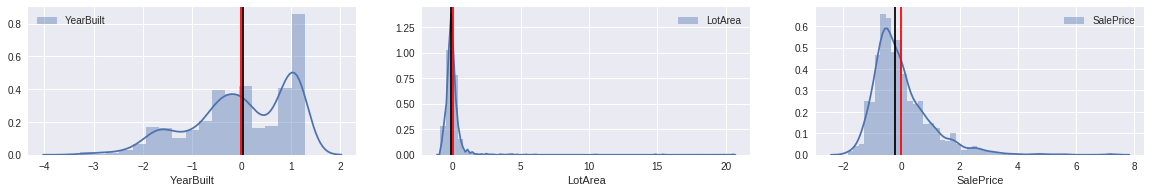

In [43]:
features = ['YearBuilt', 'LotArea', 'SalePrice']
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(features):
    fig.add_subplot(231+i)
    sns.distplot(housing_numerical_sc_df[col], label=col)
    plt.axvline(housing_numerical_sc_df[col].mean(), c='red')
    plt.axvline(housing_numerical_sc_df[col].median(), c='black')
    plt.legend()

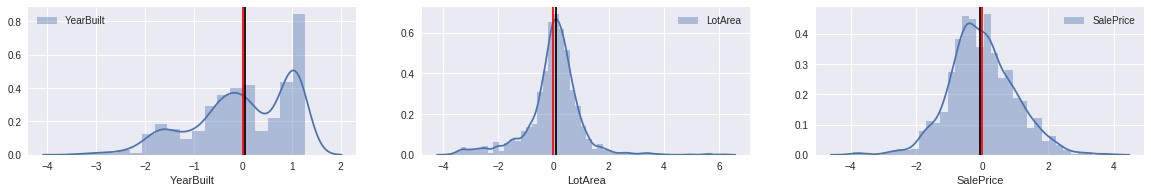

In [44]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(features):
    fig.add_subplot(231+i)
    sns.distplot( housing_numerical_log_sc_df[col], label=col)
    plt.axvline( housing_numerical_log_sc_df[col].mean(), c='red')
    plt.axvline( housing_numerical_log_sc_df[col].median(), c='black')
    plt.legend()